# **Pokémon Diffusion<a id="top"></a>**

> #### ``05-DDPM-Final_Model.ipynb``

<i><small>**Alumno:** Alejandro Pequeño Lizcano<br>Última actualización: 14/07/2024</small></i></div>

---

**Objetivo:** 
Este notebook tiene como objetivo mostrar los resultados obtenidos tras el entrenamiento del modelo DDPM para la generación de imágenes de Pokémon condicionadas al tipo de Pokémon.

- [0. Imports](#-0.-Imports)

- [1. Carga del modelo entrenado](#1-caga-del-modelo-entrenado)
- [2. Resultados del modelo](#2-resultados-del-modelo)

---

# 0. Imports

Una vez introducido el objetivo de este notebook, se importan las librerías necesarias para el desarrollo del apartado.

In [1]:
# Import necessary libraries
# =====================================================================
import tensorflow as tf
import configparser
from src.model.build_model import build_unet
from src.utils import *
from src.utils.config import parse_config
from src.model.diffusion_funcionality import *

2024-07-13 16:37:52.691546: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-13 16:37:52.721258: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Use the GPU
# =====================================================================
gpus_list = tf.config.list_physical_devices("GPU")
gpu = gpus_list[0]
tf.config.experimental.set_memory_growth(gpu, True)

print("GPUs Available: ", gpus_list)

GPUs Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2024-07-13 16:37:53.946322: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-13 16:37:53.950555: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-13 16:37:53.950674: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [3]:
# Set config file
# =====================================================================
config = configparser.ConfigParser()
config.read(CONFIG_PATH)

hyperparameters = parse_config(config, "hyperparameters")

IMG_SIZE = hyperparameters["img_size"]
NUM_CLASSES = hyperparameters["num_classes"]
BATCH_SIZE = hyperparameters["batch_size"]
EPOCHS = hyperparameters["epochs"]

TIMESTEPS = hyperparameters["timesteps"]
SCHEDULER = hyperparameters["scheduler"]
BETA_START = hyperparameters["beta_start"]
BETA_END = hyperparameters["beta_end"]
S = hyperparameters["s"]

## 1. Caga del modelo entrenado

Cargamos el modelo entrenado en el notebook anterior. Para ello, se selecciona el path del modelo y se carga, gracias a la función implementada en `diffusion_functionality.py`.

In [4]:
# Load the model
# =====================================================================
load_path = f"{MODELS_PATH}/final_diffusion_model.weights.h5"
u_net = build_unet(IMG_SIZE, NUM_CLASSES, dropout_rate=0.1)
ema_u_net = build_unet(IMG_SIZE, NUM_CLASSES, dropout_rate=0.1) # EMA model for smoother training
ema_u_net.set_weights(u_net.get_weights()) # Initialize EMA model with the same weights


model_loaded = DiffusionModel.load_model(
    load_path,
    u_net,
    ema_u_net,
    IMG_SIZE,
    NUM_CLASSES,
    TIMESTEPS,
    BETA_START,
    BETA_END,
    S,
    SCHEDULER,
    ema=0.999
)

2024-07-13 16:37:53.965483: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-13 16:37:53.965615: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-13 16:37:53.965681: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

## 2. Resultados del modelo

Tras cargar el modelo, se generan imágenes de Pokémon condicionadas a su tipo. Para ello, se seleccionan los tipos de Pokémon (opcional) y se generan las imágenes correspondientes.

Generating sample 1/6


Sampling sprite...: 100%|██████████| 999/999 [01:31<00:00, 10.92it/s]


Generating sample 2/6


Sampling sprite...: 100%|██████████| 999/999 [01:28<00:00, 11.31it/s]


Generating sample 3/6


Sampling sprite...: 100%|██████████| 999/999 [01:33<00:00, 10.71it/s]


Generating sample 4/6


Sampling sprite...: 100%|██████████| 999/999 [01:35<00:00, 10.50it/s]


Generating sample 5/6


Sampling sprite...: 100%|██████████| 999/999 [01:34<00:00, 10.57it/s]


Generating sample 6/6


Sampling sprite...: 100%|██████████| 999/999 [01:33<00:00, 10.72it/s]


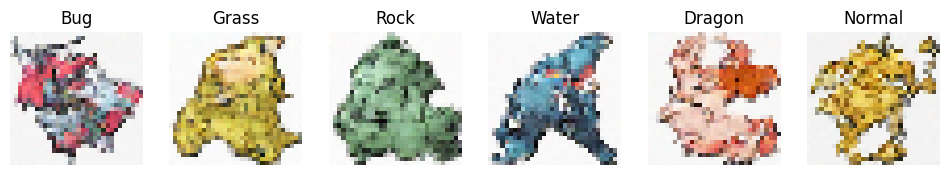

Generating sample 1/6


Sampling sprite...: 100%|██████████| 999/999 [01:32<00:00, 10.80it/s]


Generating sample 2/6


Sampling sprite...: 100%|██████████| 999/999 [01:33<00:00, 10.72it/s]


Generating sample 3/6


Sampling sprite...: 100%|██████████| 999/999 [01:30<00:00, 11.05it/s]


Generating sample 4/6


Sampling sprite...: 100%|██████████| 999/999 [01:34<00:00, 10.57it/s]


Generating sample 5/6


Sampling sprite...: 100%|██████████| 999/999 [01:33<00:00, 10.70it/s]


Generating sample 6/6


Sampling sprite...: 100%|██████████| 999/999 [01:33<00:00, 10.73it/s]


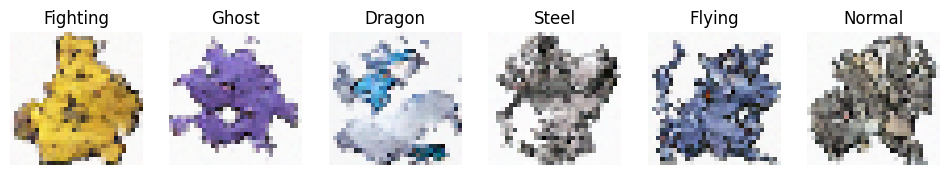

Generating sample 1/6


Sampling sprite...: 100%|██████████| 999/999 [01:30<00:00, 10.99it/s]


Generating sample 2/6


Sampling sprite...: 100%|██████████| 999/999 [01:33<00:00, 10.69it/s]


Generating sample 3/6


Sampling sprite...: 100%|██████████| 999/999 [01:34<00:00, 10.54it/s]


Generating sample 4/6


Sampling sprite...: 100%|██████████| 999/999 [01:33<00:00, 10.67it/s]


Generating sample 5/6


Sampling sprite...: 100%|██████████| 999/999 [01:32<00:00, 10.79it/s]


Generating sample 6/6


Sampling sprite...: 100%|██████████| 999/999 [01:36<00:00, 10.32it/s]


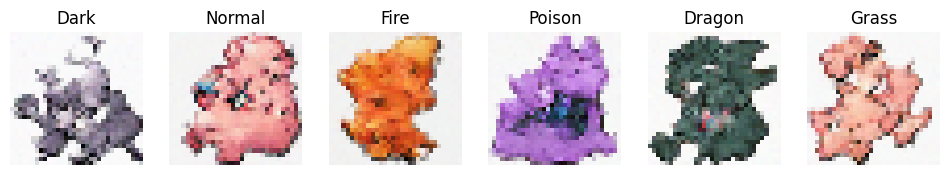

Generating sample 1/6


Sampling sprite...: 100%|██████████| 999/999 [01:31<00:00, 10.90it/s]


Generating sample 2/6


Sampling sprite...: 100%|██████████| 999/999 [01:32<00:00, 10.86it/s]


Generating sample 3/6


Sampling sprite...: 100%|██████████| 999/999 [01:31<00:00, 10.94it/s]


Generating sample 4/6


Sampling sprite...: 100%|██████████| 999/999 [01:32<00:00, 10.81it/s]


Generating sample 5/6


Sampling sprite...: 100%|██████████| 999/999 [01:32<00:00, 10.76it/s]


Generating sample 6/6


Sampling sprite...: 100%|██████████| 999/999 [01:32<00:00, 10.81it/s]


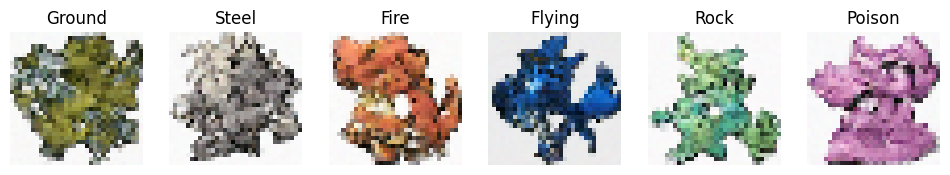

Generating sample 1/6


Sampling sprite...: 100%|██████████| 999/999 [01:32<00:00, 10.85it/s]


Generating sample 2/6


Sampling sprite...: 100%|██████████| 999/999 [01:32<00:00, 10.83it/s]


Generating sample 3/6


Sampling sprite...: 100%|██████████| 999/999 [01:28<00:00, 11.29it/s]


Generating sample 4/6


Sampling sprite...: 100%|██████████| 999/999 [01:31<00:00, 10.95it/s]


Generating sample 5/6


Sampling sprite...: 100%|██████████| 999/999 [01:29<00:00, 11.20it/s]


Generating sample 6/6


Sampling sprite...: 100%|██████████| 999/999 [01:34<00:00, 10.62it/s]


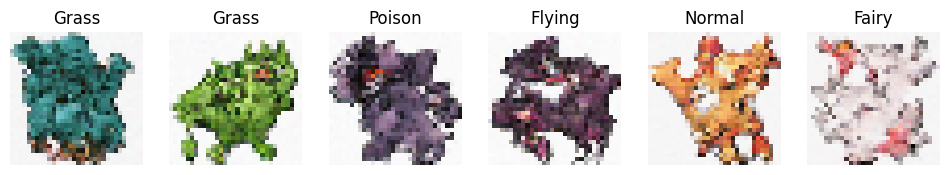

Generating sample 1/6


Sampling sprite...: 100%|██████████| 999/999 [01:30<00:00, 11.01it/s]


Generating sample 2/6


Sampling sprite...: 100%|██████████| 999/999 [01:32<00:00, 10.79it/s]


Generating sample 3/6


Sampling sprite...: 100%|██████████| 999/999 [01:33<00:00, 10.68it/s]


Generating sample 4/6


Sampling sprite...: 100%|██████████| 999/999 [01:31<00:00, 10.88it/s]


Generating sample 5/6


Sampling sprite...: 100%|██████████| 999/999 [01:38<00:00, 10.19it/s]


Generating sample 6/6


Sampling sprite...: 100%|██████████| 999/999 [01:34<00:00, 10.57it/s]


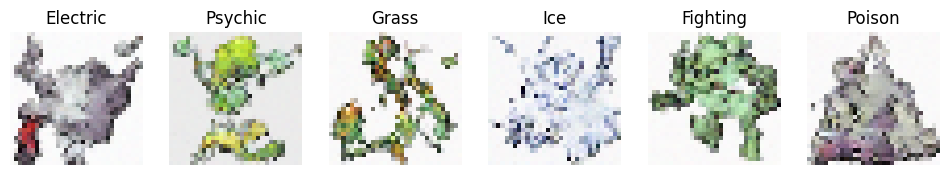

In [5]:
# Sample some sprites
# =====================================================================
model_loaded.plot_samples(6)
model_loaded.plot_samples(6)
model_loaded.plot_samples(6)
model_loaded.plot_samples(6)
model_loaded.plot_samples(6)
model_loaded.plot_samples(6)

Generating sample 1/6


Sampling sprite...: 100%|██████████| 999/999 [01:31<00:00, 10.90it/s]


Generating sample 2/6


Sampling sprite...: 100%|██████████| 999/999 [01:31<00:00, 10.91it/s]


Generating sample 3/6


Sampling sprite...: 100%|██████████| 999/999 [01:32<00:00, 10.85it/s]


Generating sample 4/6


Sampling sprite...: 100%|██████████| 999/999 [01:32<00:00, 10.84it/s]


Generating sample 5/6


Sampling sprite...: 100%|██████████| 999/999 [01:32<00:00, 10.86it/s]


Generating sample 6/6


Sampling sprite...: 100%|██████████| 999/999 [01:32<00:00, 10.86it/s]


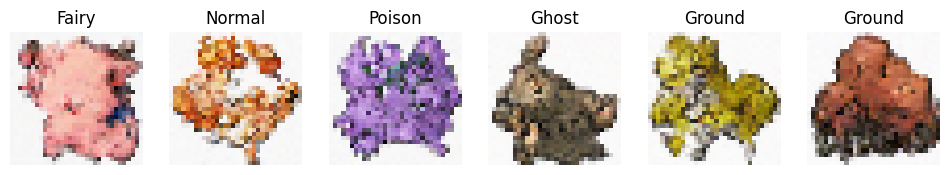

Generating sample 1/6


Sampling sprite...: 100%|██████████| 999/999 [01:31<00:00, 10.95it/s]


Generating sample 2/6


Sampling sprite...: 100%|██████████| 999/999 [01:31<00:00, 10.97it/s]


Generating sample 3/6


Sampling sprite...: 100%|██████████| 999/999 [01:31<00:00, 10.88it/s]


Generating sample 4/6


Sampling sprite...: 100%|██████████| 999/999 [01:32<00:00, 10.84it/s]


Generating sample 5/6


Sampling sprite...: 100%|██████████| 999/999 [01:32<00:00, 10.86it/s]


Generating sample 6/6


Sampling sprite...: 100%|██████████| 999/999 [01:32<00:00, 10.84it/s]


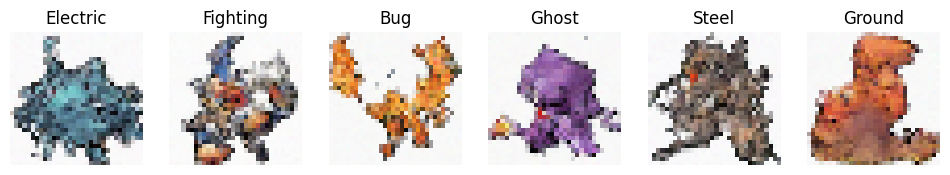

Generating sample 1/6


Sampling sprite...: 100%|██████████| 999/999 [01:32<00:00, 10.84it/s]


Generating sample 2/6


Sampling sprite...: 100%|██████████| 999/999 [01:32<00:00, 10.83it/s]


Generating sample 3/6


Sampling sprite...: 100%|██████████| 999/999 [01:32<00:00, 10.86it/s]


Generating sample 4/6


Sampling sprite...: 100%|██████████| 999/999 [01:32<00:00, 10.86it/s]


Generating sample 5/6


Sampling sprite...: 100%|██████████| 999/999 [01:32<00:00, 10.84it/s]


Generating sample 6/6


Sampling sprite...: 100%|██████████| 999/999 [01:31<00:00, 10.89it/s]


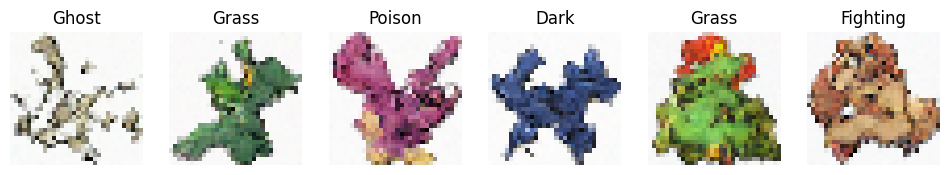

Generating sample 1/6


Sampling sprite...: 100%|██████████| 999/999 [01:31<00:00, 10.91it/s]


Generating sample 2/6


Sampling sprite...: 100%|██████████| 999/999 [01:32<00:00, 10.85it/s]


Generating sample 3/6


Sampling sprite...: 100%|██████████| 999/999 [01:32<00:00, 10.84it/s]


Generating sample 4/6


Sampling sprite...: 100%|██████████| 999/999 [01:31<00:00, 10.92it/s]


Generating sample 5/6


Sampling sprite...: 100%|██████████| 999/999 [01:32<00:00, 10.83it/s]


Generating sample 6/6


Sampling sprite...: 100%|██████████| 999/999 [01:32<00:00, 10.78it/s]


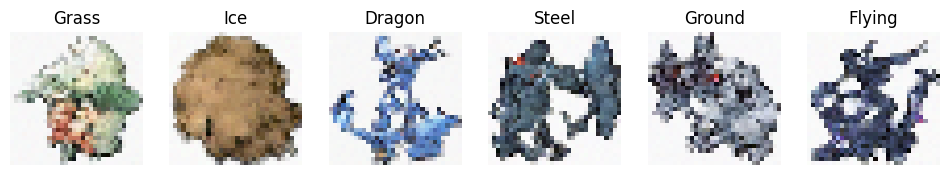

Generating sample 1/6


Sampling sprite...: 100%|██████████| 999/999 [01:31<00:00, 10.90it/s]


Generating sample 2/6


Sampling sprite...: 100%|██████████| 999/999 [01:31<00:00, 10.90it/s]


Generating sample 3/6


Sampling sprite...: 100%|██████████| 999/999 [01:31<00:00, 10.86it/s]


Generating sample 4/6


Sampling sprite...: 100%|██████████| 999/999 [01:32<00:00, 10.85it/s]


Generating sample 5/6


Sampling sprite...: 100%|██████████| 999/999 [01:33<00:00, 10.67it/s]


Generating sample 6/6


Sampling sprite...: 100%|██████████| 999/999 [01:34<00:00, 10.56it/s]


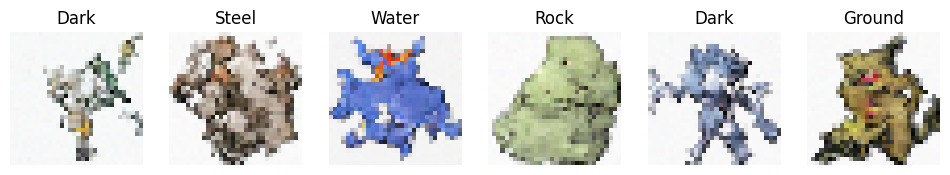

Generating sample 1/6


Sampling sprite...: 100%|██████████| 999/999 [01:33<00:00, 10.64it/s]


Generating sample 2/6


Sampling sprite...: 100%|██████████| 999/999 [01:33<00:00, 10.66it/s]


Generating sample 3/6


Sampling sprite...: 100%|██████████| 999/999 [01:33<00:00, 10.65it/s]


Generating sample 4/6


Sampling sprite...: 100%|██████████| 999/999 [01:34<00:00, 10.62it/s]


Generating sample 5/6


Sampling sprite...: 100%|██████████| 999/999 [01:35<00:00, 10.49it/s]


Generating sample 6/6


Sampling sprite...: 100%|██████████| 999/999 [01:38<00:00, 10.17it/s]


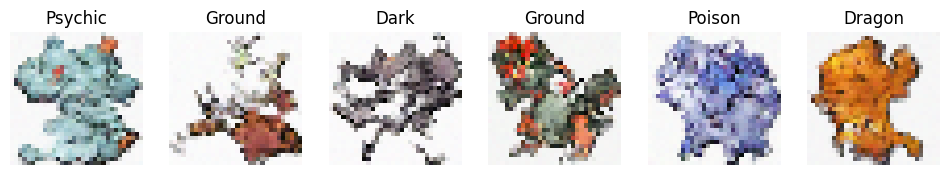

In [9]:
model_loaded.plot_samples(6)
model_loaded.plot_samples(6)
model_loaded.plot_samples(6)
model_loaded.plot_samples(6)
model_loaded.plot_samples(6)
model_loaded.plot_samples(6)

Generating sample 1/6


Sampling sprite...: 100%|██████████| 999/999 [01:35<00:00, 10.47it/s]


Generating sample 2/6


Sampling sprite...: 100%|██████████| 999/999 [01:31<00:00, 10.88it/s]


Generating sample 3/6


Sampling sprite...: 100%|██████████| 999/999 [01:32<00:00, 10.78it/s]


Generating sample 4/6


Sampling sprite...: 100%|██████████| 999/999 [01:32<00:00, 10.75it/s]


Generating sample 5/6


Sampling sprite...: 100%|██████████| 999/999 [01:33<00:00, 10.71it/s]


Generating sample 6/6


Sampling sprite...: 100%|██████████| 999/999 [01:32<00:00, 10.78it/s]


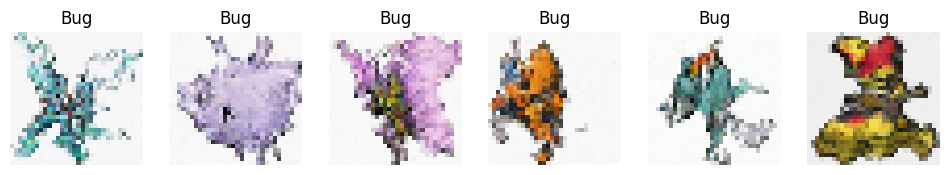

Generating sample 1/6


Sampling sprite...: 100%|██████████| 999/999 [01:32<00:00, 10.79it/s]


Generating sample 2/6


Sampling sprite...: 100%|██████████| 999/999 [01:31<00:00, 10.86it/s]


Generating sample 3/6


Sampling sprite...: 100%|██████████| 999/999 [01:33<00:00, 10.68it/s]


Generating sample 4/6


Sampling sprite...: 100%|██████████| 999/999 [01:34<00:00, 10.59it/s]


Generating sample 5/6


Sampling sprite...: 100%|██████████| 999/999 [01:34<00:00, 10.58it/s]


Generating sample 6/6


Sampling sprite...: 100%|██████████| 999/999 [01:33<00:00, 10.66it/s]


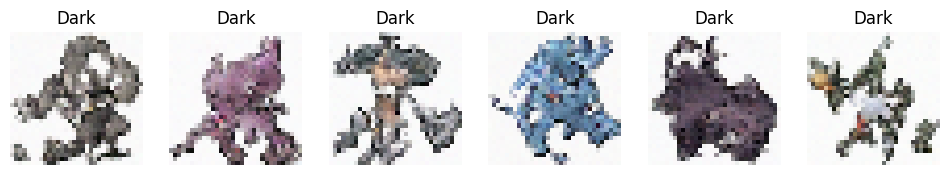

Generating sample 1/6


Sampling sprite...: 100%|██████████| 999/999 [01:32<00:00, 10.84it/s]


Generating sample 2/6


Sampling sprite...: 100%|██████████| 999/999 [01:31<00:00, 10.88it/s]


Generating sample 3/6


Sampling sprite...: 100%|██████████| 999/999 [01:35<00:00, 10.51it/s]


Generating sample 4/6


Sampling sprite...: 100%|██████████| 999/999 [01:34<00:00, 10.56it/s]


Generating sample 5/6


Sampling sprite...: 100%|██████████| 999/999 [01:34<00:00, 10.59it/s]


Generating sample 6/6


Sampling sprite...: 100%|██████████| 999/999 [01:34<00:00, 10.59it/s]


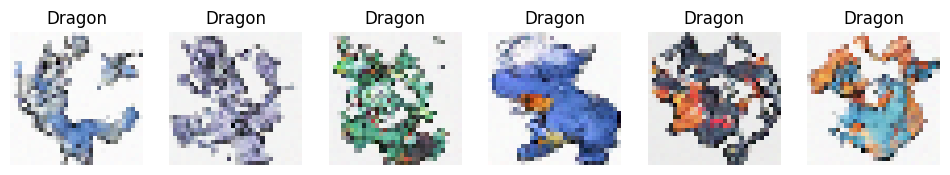

Generating sample 1/6


Sampling sprite...: 100%|██████████| 999/999 [01:35<00:00, 10.49it/s]


Generating sample 2/6


Sampling sprite...: 100%|██████████| 999/999 [01:34<00:00, 10.52it/s]


Generating sample 3/6


Sampling sprite...: 100%|██████████| 999/999 [01:34<00:00, 10.56it/s]


Generating sample 4/6


Sampling sprite...: 100%|██████████| 999/999 [01:35<00:00, 10.48it/s]


Generating sample 5/6


Sampling sprite...: 100%|██████████| 999/999 [01:32<00:00, 10.76it/s]


Generating sample 6/6


Sampling sprite...: 100%|██████████| 999/999 [01:33<00:00, 10.70it/s]


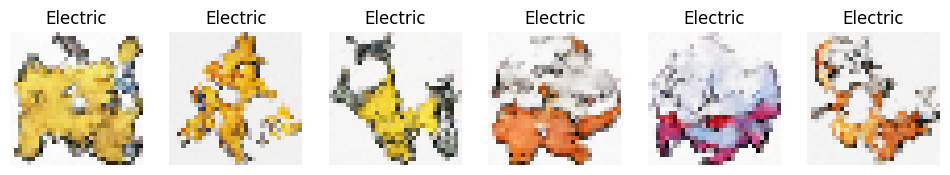

Generating sample 1/6


Sampling sprite...: 100%|██████████| 999/999 [01:36<00:00, 10.41it/s]


Generating sample 2/6


Sampling sprite...: 100%|██████████| 999/999 [01:36<00:00, 10.34it/s]


Generating sample 3/6


Sampling sprite...: 100%|██████████| 999/999 [01:35<00:00, 10.43it/s]


Generating sample 4/6


Sampling sprite...: 100%|██████████| 999/999 [01:37<00:00, 10.27it/s]


Generating sample 5/6


Sampling sprite...: 100%|██████████| 999/999 [01:38<00:00, 10.16it/s]


Generating sample 6/6


Sampling sprite...: 100%|██████████| 999/999 [01:37<00:00, 10.29it/s]


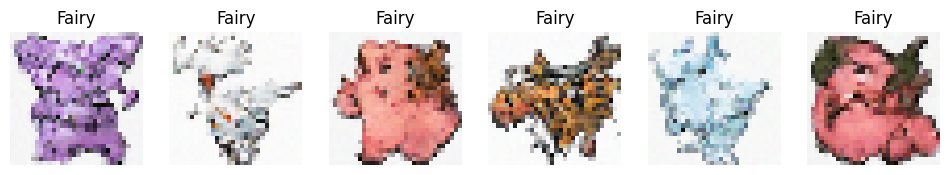

Generating sample 1/6


Sampling sprite...: 100%|██████████| 999/999 [01:36<00:00, 10.38it/s]


Generating sample 2/6


Sampling sprite...: 100%|██████████| 999/999 [01:36<00:00, 10.40it/s]


Generating sample 3/6


Sampling sprite...: 100%|██████████| 999/999 [01:36<00:00, 10.39it/s]


Generating sample 4/6


Sampling sprite...: 100%|██████████| 999/999 [01:37<00:00, 10.25it/s]


Generating sample 5/6


Sampling sprite...: 100%|██████████| 999/999 [01:36<00:00, 10.33it/s]


Generating sample 6/6


Sampling sprite...: 100%|██████████| 999/999 [01:36<00:00, 10.31it/s]


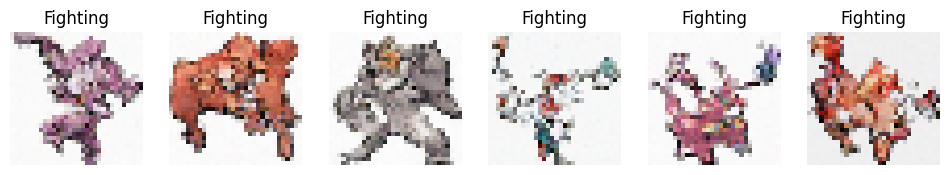

In [6]:
model_loaded.plot_samples(6, "Bug")
model_loaded.plot_samples(6, "Dark")
model_loaded.plot_samples(6, "Dragon")
model_loaded.plot_samples(6, "Electric")
model_loaded.plot_samples(6, "Fairy")
model_loaded.plot_samples(6, "Fighting")

Generating sample 1/6


Sampling sprite...: 100%|██████████| 999/999 [01:36<00:00, 10.30it/s]


Generating sample 2/6


Sampling sprite...: 100%|██████████| 999/999 [01:37<00:00, 10.23it/s]


Generating sample 3/6


Sampling sprite...: 100%|██████████| 999/999 [01:37<00:00, 10.23it/s]


Generating sample 4/6


Sampling sprite...: 100%|██████████| 999/999 [01:37<00:00, 10.22it/s]


Generating sample 5/6


Sampling sprite...: 100%|██████████| 999/999 [01:34<00:00, 10.55it/s]


Generating sample 6/6


Sampling sprite...: 100%|██████████| 999/999 [01:33<00:00, 10.63it/s]


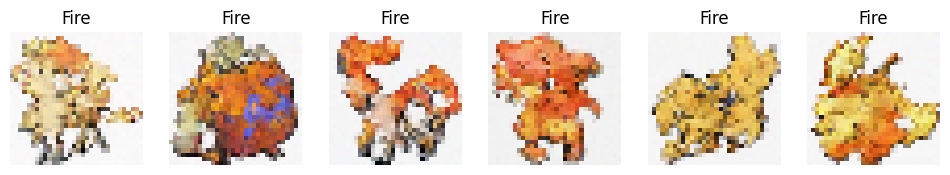

Generating sample 1/6


Sampling sprite...: 100%|██████████| 999/999 [01:36<00:00, 10.32it/s]


Generating sample 2/6


Sampling sprite...: 100%|██████████| 999/999 [01:36<00:00, 10.35it/s]


Generating sample 3/6


Sampling sprite...: 100%|██████████| 999/999 [01:37<00:00, 10.27it/s]


Generating sample 4/6


Sampling sprite...: 100%|██████████| 999/999 [01:43<00:00,  9.69it/s]


Generating sample 5/6


Sampling sprite...: 100%|██████████| 999/999 [01:39<00:00, 10.08it/s]


Generating sample 6/6


Sampling sprite...: 100%|██████████| 999/999 [01:37<00:00, 10.24it/s]


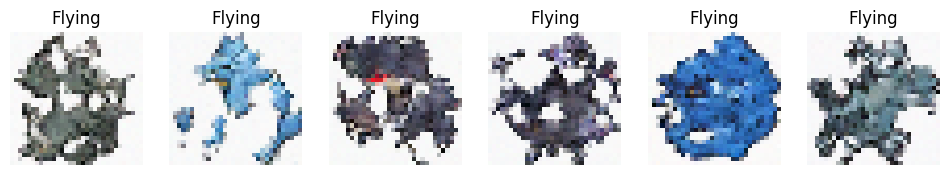

Generating sample 1/6


Sampling sprite...: 100%|██████████| 999/999 [01:36<00:00, 10.35it/s]


Generating sample 2/6


Sampling sprite...: 100%|██████████| 999/999 [01:38<00:00, 10.14it/s]


Generating sample 3/6


Sampling sprite...: 100%|██████████| 999/999 [01:39<00:00, 10.07it/s]


Generating sample 4/6


Sampling sprite...: 100%|██████████| 999/999 [01:38<00:00, 10.13it/s]


Generating sample 5/6


Sampling sprite...: 100%|██████████| 999/999 [01:36<00:00, 10.38it/s]


Generating sample 6/6


Sampling sprite...: 100%|██████████| 999/999 [01:36<00:00, 10.32it/s]


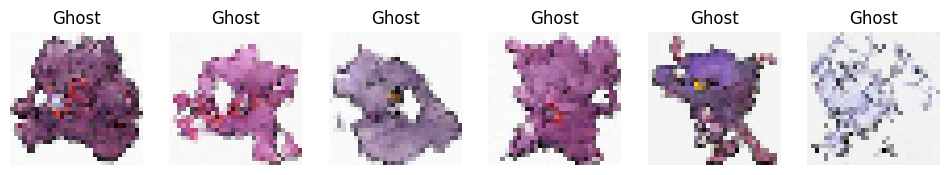

Generating sample 1/6


Sampling sprite...: 100%|██████████| 999/999 [01:39<00:00, 10.09it/s]


Generating sample 2/6


Sampling sprite...: 100%|██████████| 999/999 [01:35<00:00, 10.46it/s]


Generating sample 3/6


Sampling sprite...: 100%|██████████| 999/999 [01:37<00:00, 10.27it/s]


Generating sample 4/6


Sampling sprite...: 100%|██████████| 999/999 [01:37<00:00, 10.22it/s]


Generating sample 5/6


Sampling sprite...: 100%|██████████| 999/999 [01:37<00:00, 10.25it/s]


Generating sample 6/6


Sampling sprite...: 100%|██████████| 999/999 [01:36<00:00, 10.31it/s]


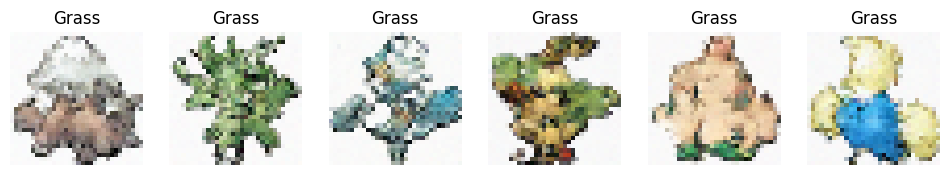

Generating sample 1/6


Sampling sprite...: 100%|██████████| 999/999 [01:35<00:00, 10.41it/s]


Generating sample 2/6


Sampling sprite...: 100%|██████████| 999/999 [01:37<00:00, 10.30it/s]


Generating sample 3/6


Sampling sprite...: 100%|██████████| 999/999 [01:36<00:00, 10.31it/s]


Generating sample 4/6


Sampling sprite...: 100%|██████████| 999/999 [01:36<00:00, 10.31it/s]


Generating sample 5/6


Sampling sprite...: 100%|██████████| 999/999 [01:40<00:00,  9.96it/s]


Generating sample 6/6


Sampling sprite...: 100%|██████████| 999/999 [01:38<00:00, 10.15it/s]


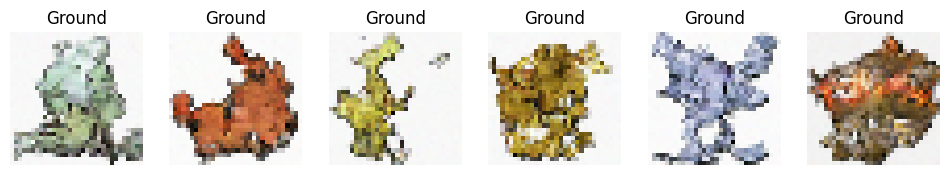

Generating sample 1/6


Sampling sprite...: 100%|██████████| 999/999 [01:36<00:00, 10.30it/s]


Generating sample 2/6


Sampling sprite...: 100%|██████████| 999/999 [01:36<00:00, 10.31it/s]


Generating sample 3/6


Sampling sprite...: 100%|██████████| 999/999 [01:38<00:00, 10.14it/s]


Generating sample 4/6


Sampling sprite...: 100%|██████████| 999/999 [01:38<00:00, 10.18it/s]


Generating sample 5/6


Sampling sprite...: 100%|██████████| 999/999 [01:37<00:00, 10.25it/s]


Generating sample 6/6


Sampling sprite...: 100%|██████████| 999/999 [01:40<00:00,  9.94it/s]


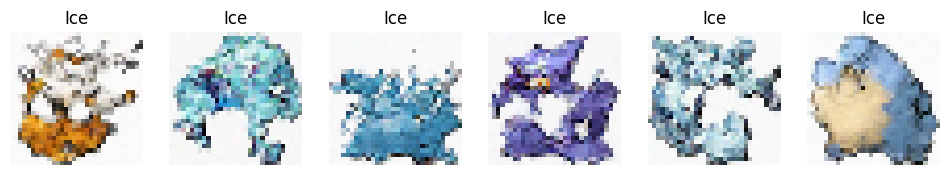

In [7]:
model_loaded.plot_samples(6, "Fire")
model_loaded.plot_samples(6, "Flying")
model_loaded.plot_samples(6, "Ghost")
model_loaded.plot_samples(6, "Grass")
model_loaded.plot_samples(6, "Ground")
model_loaded.plot_samples(6, "Ice")

Generating sample 1/6


Sampling sprite...: 100%|██████████| 999/999 [01:36<00:00, 10.36it/s]


Generating sample 2/6


Sampling sprite...: 100%|██████████| 999/999 [01:38<00:00, 10.11it/s]


Generating sample 3/6


Sampling sprite...: 100%|██████████| 999/999 [01:36<00:00, 10.30it/s]


Generating sample 4/6


Sampling sprite...: 100%|██████████| 999/999 [01:36<00:00, 10.32it/s]


Generating sample 5/6


Sampling sprite...: 100%|██████████| 999/999 [01:35<00:00, 10.42it/s]


Generating sample 6/6


Sampling sprite...: 100%|██████████| 999/999 [01:36<00:00, 10.39it/s]


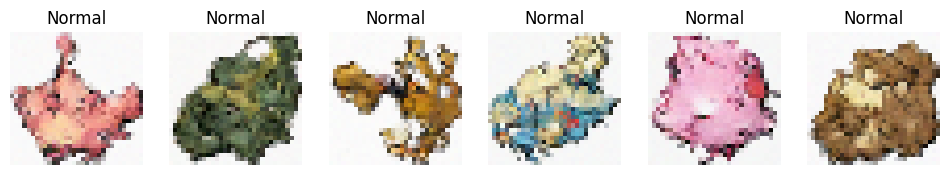

Generating sample 1/6


Sampling sprite...: 100%|██████████| 999/999 [01:36<00:00, 10.33it/s]


Generating sample 2/6


Sampling sprite...: 100%|██████████| 999/999 [01:34<00:00, 10.53it/s]


Generating sample 3/6


Sampling sprite...: 100%|██████████| 999/999 [01:32<00:00, 10.85it/s]


Generating sample 4/6


Sampling sprite...: 100%|██████████| 999/999 [01:31<00:00, 10.90it/s]


Generating sample 5/6


Sampling sprite...: 100%|██████████| 999/999 [01:31<00:00, 10.91it/s]


Generating sample 6/6


Sampling sprite...: 100%|██████████| 999/999 [01:30<00:00, 11.04it/s]


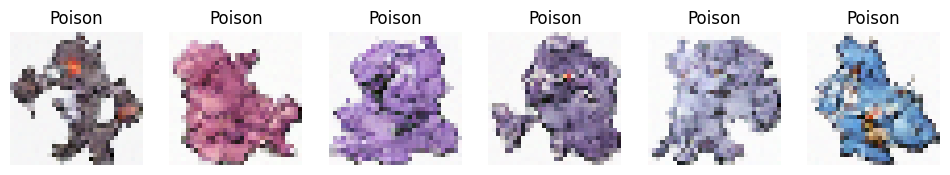

Generating sample 1/6


Sampling sprite...: 100%|██████████| 999/999 [01:27<00:00, 11.37it/s]


Generating sample 2/6


Sampling sprite...: 100%|██████████| 999/999 [01:35<00:00, 10.41it/s]


Generating sample 3/6


Sampling sprite...: 100%|██████████| 999/999 [01:29<00:00, 11.15it/s]


Generating sample 4/6


Sampling sprite...: 100%|██████████| 999/999 [01:33<00:00, 10.72it/s]


Generating sample 5/6


Sampling sprite...: 100%|██████████| 999/999 [01:34<00:00, 10.52it/s]


Generating sample 6/6


Sampling sprite...: 100%|██████████| 999/999 [01:36<00:00, 10.33it/s]


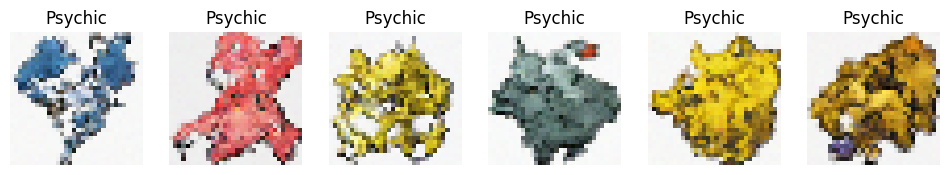

Generating sample 1/6


Sampling sprite...: 100%|██████████| 999/999 [01:33<00:00, 10.71it/s]


Generating sample 2/6


Sampling sprite...: 100%|██████████| 999/999 [01:33<00:00, 10.71it/s]


Generating sample 3/6


Sampling sprite...: 100%|██████████| 999/999 [01:33<00:00, 10.64it/s]


Generating sample 4/6


Sampling sprite...: 100%|██████████| 999/999 [01:34<00:00, 10.61it/s]


Generating sample 5/6


Sampling sprite...: 100%|██████████| 999/999 [01:34<00:00, 10.62it/s]


Generating sample 6/6


Sampling sprite...: 100%|██████████| 999/999 [01:34<00:00, 10.63it/s]


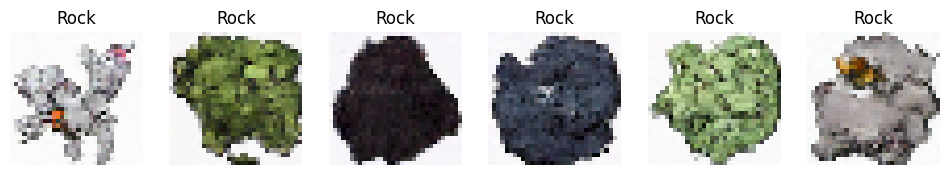

Generating sample 1/6


Sampling sprite...: 100%|██████████| 999/999 [01:33<00:00, 10.70it/s]


Generating sample 2/6


Sampling sprite...: 100%|██████████| 999/999 [01:33<00:00, 10.68it/s]


Generating sample 3/6


Sampling sprite...: 100%|██████████| 999/999 [01:32<00:00, 10.75it/s]


Generating sample 4/6


Sampling sprite...: 100%|██████████| 999/999 [01:34<00:00, 10.63it/s]


Generating sample 5/6


Sampling sprite...: 100%|██████████| 999/999 [01:34<00:00, 10.60it/s]


Generating sample 6/6


Sampling sprite...: 100%|██████████| 999/999 [01:34<00:00, 10.57it/s]


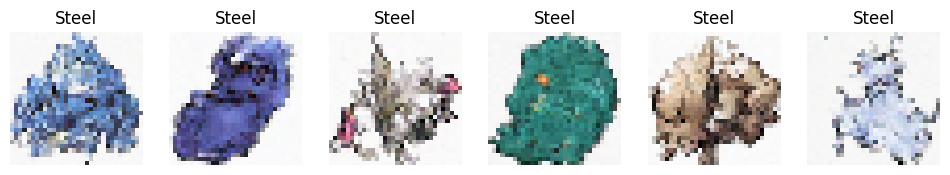

Generating sample 1/6


Sampling sprite...: 100%|██████████| 999/999 [01:33<00:00, 10.67it/s]


Generating sample 2/6


Sampling sprite...: 100%|██████████| 999/999 [01:34<00:00, 10.59it/s]


Generating sample 3/6


Sampling sprite...: 100%|██████████| 999/999 [01:33<00:00, 10.65it/s]


Generating sample 4/6


Sampling sprite...: 100%|██████████| 999/999 [01:34<00:00, 10.62it/s]


Generating sample 5/6


Sampling sprite...: 100%|██████████| 999/999 [01:33<00:00, 10.67it/s]


Generating sample 6/6


Sampling sprite...: 100%|██████████| 999/999 [01:33<00:00, 10.69it/s]


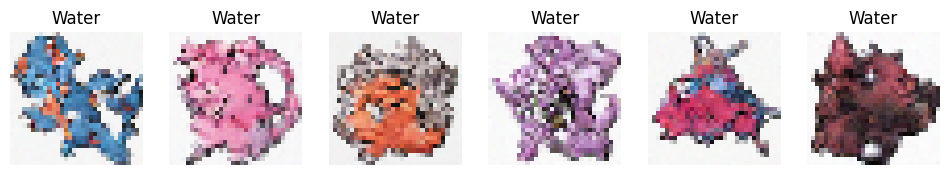

In [8]:
model_loaded.plot_samples(6, "Normal")
model_loaded.plot_samples(6, "Poison")
model_loaded.plot_samples(6, "Psychic")
model_loaded.plot_samples(6, "Rock")
model_loaded.plot_samples(6, "Steel")
model_loaded.plot_samples(6, "Water")